<a href="https://colab.research.google.com/github/SokhnaMery/Mon_depot_coursData/blob/main/Introduction_au_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Masterclass - Introduction au Machine Learning

## 1. Premier jeu de données: les blobs

> Le jeu de données qui nous intéresse ici contient deux variables explicatives, appelées `feature1` et `feature2`. Nous avons une variable cible appelée `target`. La variable `target` contient uniquement des 0 et des 1, signifiant que l'observation appartient au groupe 0 ou au groupe 1.

* (a) De quel type de problème s'agit-il ?


> Notre jeu de données a des données générées de manière aléatoire.

* (b) Exécutez la cellule suivante pour générer les données

In [ ]:
import pandas as pd
import numpy as np

size = 1000

x = np.concatenate([
    np.random.normal(loc=5, scale=1, size=200),
    np.random.normal(loc=10, scale=1, size=200)
])
y = np.concatenate([
    np.random.normal(loc=5, scale=1, size=200),
    np.random.normal(loc=10, scale=1, size=200)
])

target = np.concatenate([
    np.ones(shape=200),
    np.zeros(shape=200)
])

df = pd.DataFrame(
    {
        'feature1':x,
        'feature2': y,
        'target': target
    }
)

df["target"] = df["target"].astype(int)

df.head()

,feature1,feature2,target
0,3.772257,4.479482,1
1,4.052887,5.251977,1
2,5.010764,5.620890,1
3,5.147485,5.761979,1
4,5.284064,3.935256,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  400 non-null    float64
 1   feature2  400 non-null    float64
 2   target    400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


> Une bonne pratique consiste à afficher les valeurs manquantes ainsi que la distribution des données.

* (c) Affichez les valeurs manquantes ainsi que la distribution des données

In [ ]:
print(df.isna().sum())

df.describe()

feature1    0
feature2    0
target      0
dtype: int64


,feature1,feature2,target
count,400.000000,400.000000,400.000000
mean,7.477166,7.494827,0.500000
std,2.669171,2.655524,0.500626
min,1.083651,1.994903,0.000000
25%,5.041315,5.058458,0.000000
50%,7.356582,7.700858,0.500000
75%,9.997982,9.890268,1.000000
max,12.317722,12.566147,1.000000


> Une autre façon de prendre en main le jeu de données est d'afficher des histogrammes pour mieux comprendre la distribution des données.

* (d) Exécuter la cellule suivante

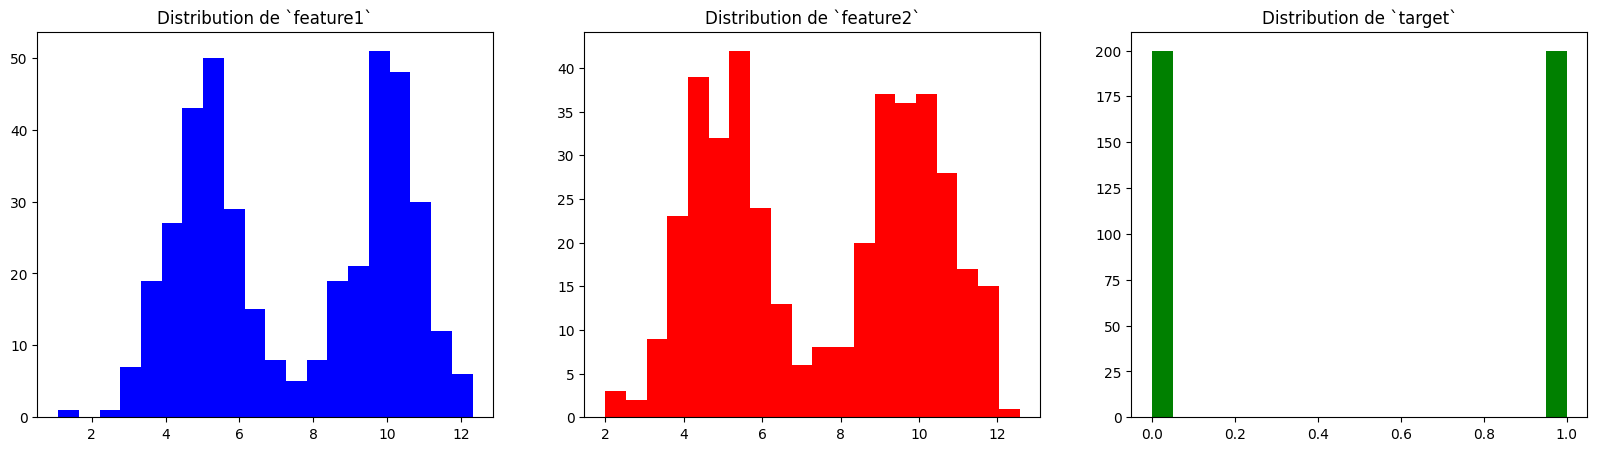

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].hist(df['feature1'], color='b', bins=20)
axes[0].set_title('Distribution de `feature1`')
axes[1].hist(df['feature2'], color='r', bins=20)
axes[1].set_title('Distribution de `feature2`')
axes[2].hist(df['target'], color='g', bins=20)
axes[2].set_title('Distribution de `target`')

plt.show()

> Dans ce cas particulier, on peut représenter les trois variables sur un même graphique.

* (c) Exécuter la cellule suivante

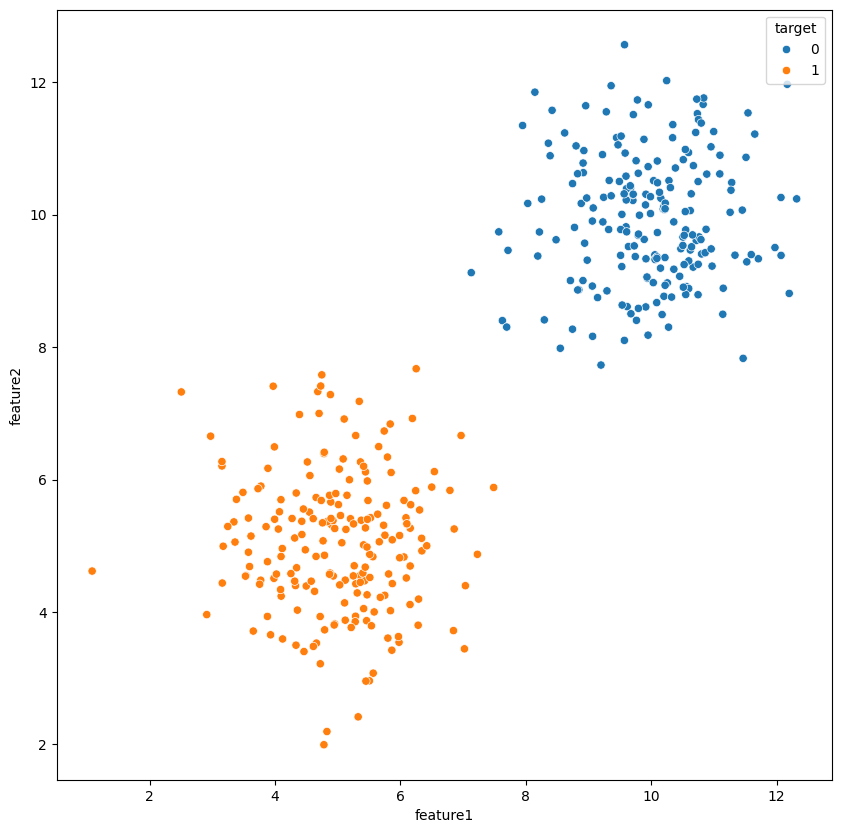

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='feature1', y='feature2', data=df, hue='target')
plt.show()

> Pour rappel, notre but est ici de trouver une règle qui permet de décider si une donnée en entrée appartient à l'une ou l'autre des classes.

* (c) Proposez une fonction qui permet de prédire la classe des observations

In [ ]:
def predict(feature_1, feature_2):
  return ((feature_1 < 8) & (feature_2 < 8)) * 1

In [ ]:
df.head()

,feature1,feature2,target
0,3.772257,4.479482,1
1,4.052887,5.251977,1
2,5.010764,5.620890,1
3,5.147485,5.761979,1
4,5.284064,3.935256,1


In [ ]:
predictions = predict(df.feature1, df.feature2)

predictions

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

> On peut à présent comparer les prédictions avec les résultats avec une matrice de confusion.

* (d) Exécutez la cellule suivante

In [ ]:
df['prediction'] = predict(df['feature1'], df['feature2'])

pd.crosstab(df['prediction'], df['target'])


target,0,1
prediction,,
0,200,0
1,0,200


> On va aussi afficher les prédictions sur un graphique.

* (e) Exécutez la cellule suivante


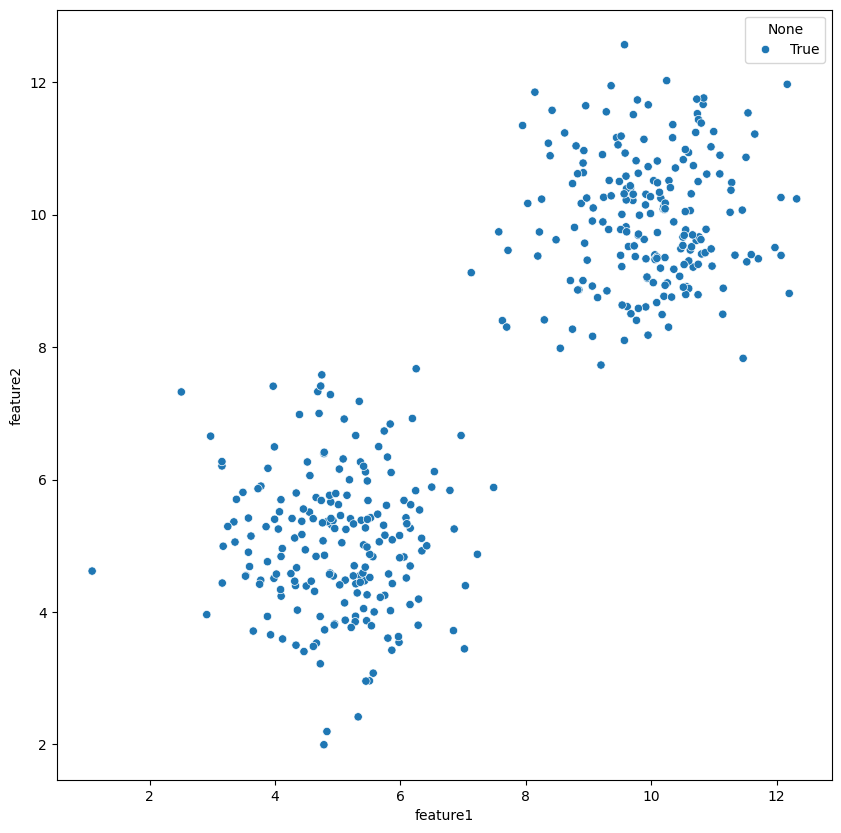

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='feature1', y='feature2', data=df, hue=df['target']==df['prediction'])
plt.show()

* (f) Calculez la précision de l'algorithme

In [ ]:
sum(df['prediction'] == df['target']) / len(df)

from sklearn.metrics import accuracy_score

accuracy_score(df['target'], df['prediction'])

1.0

## 2. Deuxième jeu de données: les lunes

> Ce deuxième jeu de données est plus complexe.

* (a) Exécutez cette cellule pour générer les données

In [ ]:
from sklearn.datasets import make_biclusters, make_moons

data = make_moons(n_samples=400, noise=.2)
x = data[0][:, 0]
y = data[0][:, 1]
target = data[1]

df = pd.DataFrame(
    {
        'feature1': x,
        'feature2': y,
        'target': target
    }
)

df['target'] = df['target'].astype(int)

df.head()

,feature1,feature2,target
0,-0.527981,0.878359,0
1,1.169237,-0.231216,1
2,-0.227569,1.148707,0
3,1.059187,0.313638,0
4,0.717288,-0.117313,1


> Nous allons essayer de reproduire les mêmes étapes que dans la première partie.

* (b) Reproduisez les étapes de la partie précédente

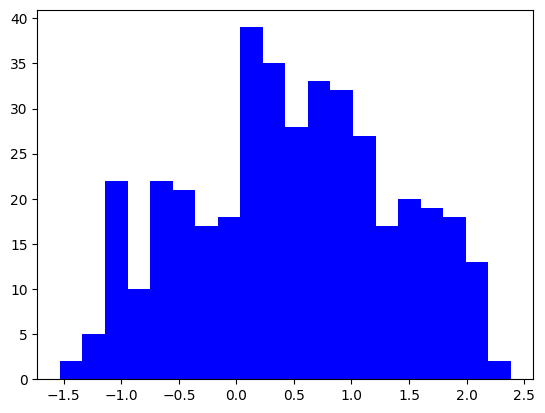

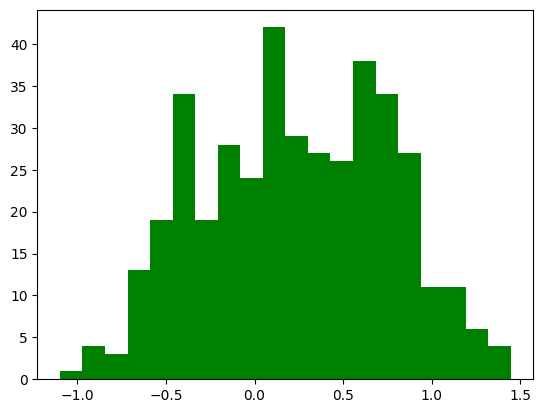

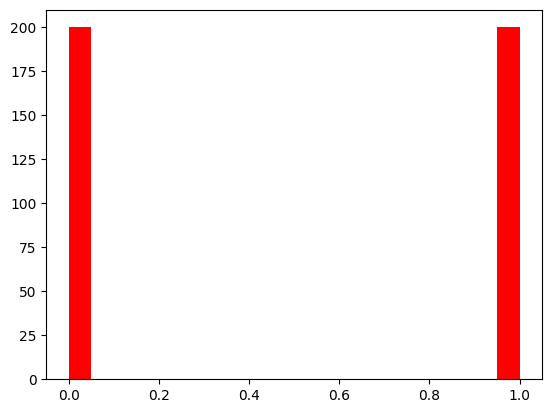

In [ ]:
# Reproduire les étapes précédentes

plt.hist(df['feature1'], bins=20, color='b')
plt.show()

plt.hist(df['feature2'], bins=20, color='g')
plt.show()

plt.hist(df['target'], bins=20, color='r')
plt.show()




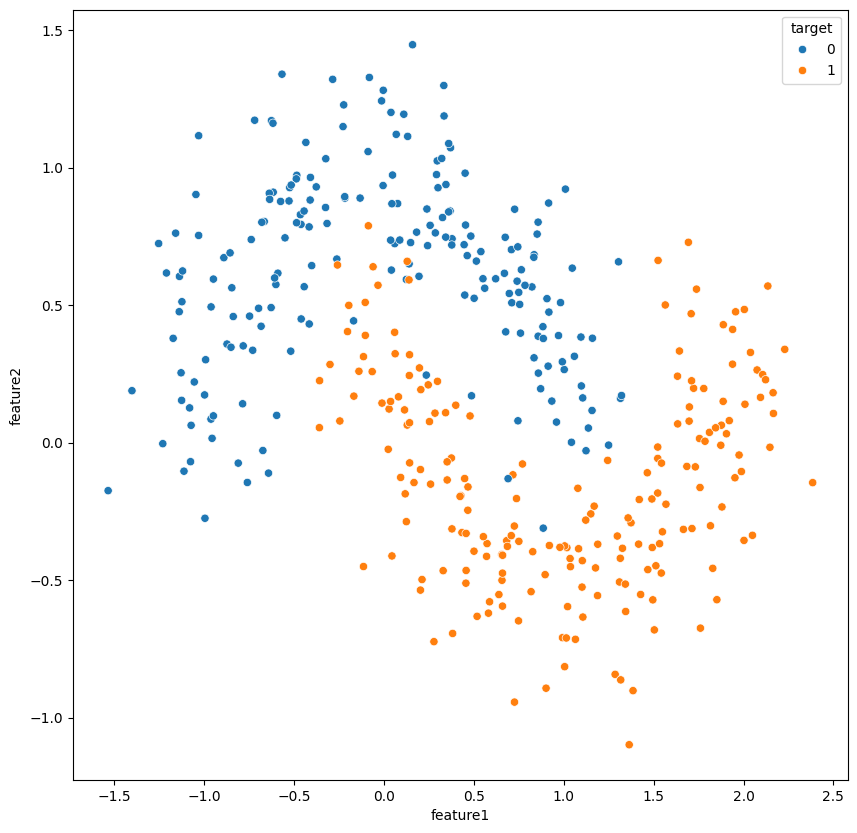

In [ ]:
plt.figure(figsize=(10, 10))
# plt.scatter(df['feature1'], df['feature2'], c=df['target'])
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df)

plt.show()

In [ ]:
pred = ((df.feature1 > 0 ) & (df.feature2 < 0.5)) * 1

accuracy_score(df['target'], pred)

0.8575

> On remarque que la fonction de décision semble difficile à prendre en compte. Pour arriver à trouver une fonction de décision facilement, on peut utiliser un modèle de Machine Learning. Dans la cellule suivante, on instancie 3 modèles de Machine Learning. On peut les entraîner en utilisant la méthode `fit` et on peut obtenir des prédictions en utilisant la méthode `predict`.

* (c) Exécutez la prochaine cellule pour créer ces modèles et appliquez les au jeu de données

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


modele1 = LogisticRegression()
modele2 = DecisionTreeClassifier()
modele3 = SVC()
modele4 = KNeighborsClassifier()


modele1.fit(df[['feature1', 'feature2']], df['target'])
modele2.fit(df[['feature1', 'feature2']], df['target'])
modele3.fit(df[['feature1', 'feature2']], df['target'])
modele4.fit(df[['feature1', 'feature2']], df['target'])




KNeighborsClassifier()

In [ ]:
accuracy_score(df['target'], modele1.predict(df[['feature1', 'feature2']]))

0.8525

In [ ]:
accuracy_score(df['target'], modele2.predict(df[['feature1', 'feature2']]))

1.0

In [ ]:
accuracy_score(df['target'], modele3.predict(df[['feature1', 'feature2']]))

0.97

In [ ]:
accuracy_score(df['target'], modele4.predict(df[['feature1', 'feature2']]))

0.975

In [ ]:
data = make_moons(n_samples=2000, noise=.2)
x = data[0][:, 0]
y = data[0][:, 1]
target = data[1]

new_df = pd.DataFrame(
    {
        'feature1': x,
        'feature2': y,
        'target': target

    }
)



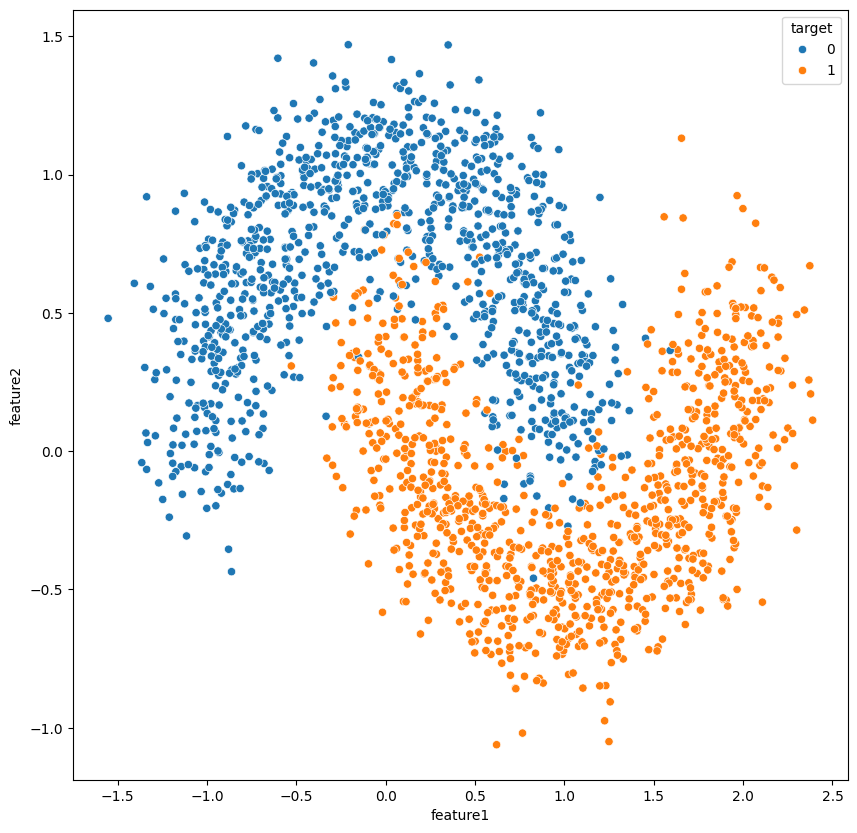

In [ ]:
plt.figure(figsize=(10, 10))
# plt.scatter(df['feature1'], df['feature2'], c=df['target'])
sns.scatterplot(x='feature1', y='feature2', hue='target', data=new_df)

plt.show()

In [ ]:
accuracy_score(modele1.predict(new_df[['feature1', 'feature2']]), new_df['target'])


0.8625

In [ ]:
accuracy_score(modele2.predict(new_df[['feature1', 'feature2']]), new_df['target'])


0.945

In [ ]:
accuracy_score(modele3.predict(new_df[['feature1', 'feature2']]), new_df['target'])


0.965

In [ ]:
accuracy_score(modele4.predict(new_df[['feature1', 'feature2']]), new_df['target'])


0.964

## 4. Mise en situation sur un petit projet de Machine Learning
> Le jeu de données que nous allons utiliser recense diverses caractéristiques de pingouins.  
L'objectif sera, à partir de ces caractéristiques, de classifier les pingouins par espèce.
>
> Le dataset est assez simple, et ne comporte que 7 colonnes, pour environ 400 lignes.   
> Les variables sont les suivantes :
>
>*   `species` l'espèce du pingouin (Chinstrap, Adélie, or Gentoo)
>
>
>* `culmen_length_m`: longueur du culmen (mm)
>
>
>* `culmen_depth_mm`: profondeur du culmen(mm)
>
>
>* `flipper_length_mm`: longueur de la nageoire (mm)
>
>
>* `body_mass_g`: masse  (g)
>
>
>* `island`: nom de l'île  (Dream, Torgersen, or Biscoe) de recensement
>
>
>* `sex`: sexe du pingouin
>
>
* (a) Exécuter la cellule suivante pour charger les données et afficher les premières lignes.

In [ ]:
df = pd.read_csv('https://assets-datascientest.s3-eu-west-1.amazonaws.com/de/resources/datasets/penguins_size.csv')

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


> Dès les premières lignes on se rend compte que le jeu de données comportent des valeurs manquantes.
>
>
* (b) Exécuter la cellule suivante pour recenser le nombre de valeurs manquantes par colonne.

In [ ]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


> Mise à part la variable `sex`, les autres variables présentant des valeurs manquantes sont numériques.  
> On procèdera en deux temps.  
>
>
* (c) Remplacer les valeurs manquantes de la variable `sex` par son mode.
* (d) Remplacer le reste des valeurs manquantes par les moyennes des variables correspondantes.

In [ ]:

df['sex']=df['sex'].fillna(df['sex'].mode()[0])


In [ ]:
df.isna().sum()
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

<ipython-input-94-435b4edc4083>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
<ipython-input-94-435b4edc4083>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
<ipython-input-94-435b4edc4083>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [ ]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4199.780059,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4199.780059,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [ ]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

> Maintenant que nous nous sommes débarassés des valeurs manquantes, essayons de visualiser les données avec lesquelles nous allons travailler.  
>
>
* (e) Afficher la distribution des données.
* (f) Afficher la distribution de la variable cible `species`.

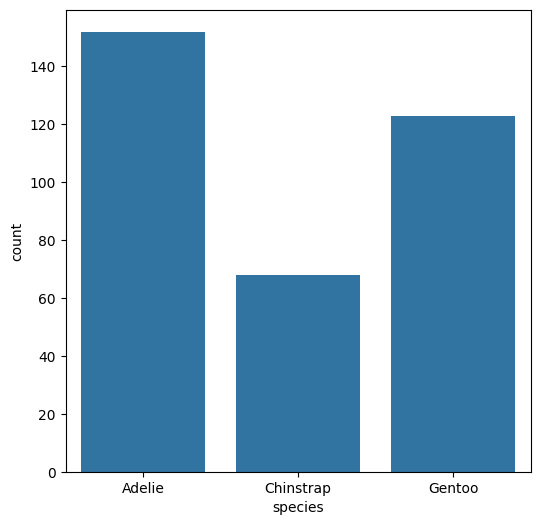

In [ ]:
#df.describe()

plt.figure(figsize=(6,6))
sns.countplot(x = 'species', data = df);
plt.show();

> Il peut être intéressant également d'observer les répartitions de données pour voir si l'on repère des schémas utiles à la modélisation.
>
>
* (g) Dans différents scatterplots, afficher les variables de votre choix en fonction de la longueur ou la profondeur du culmen. Colorer les points en fonction de l'espèce.

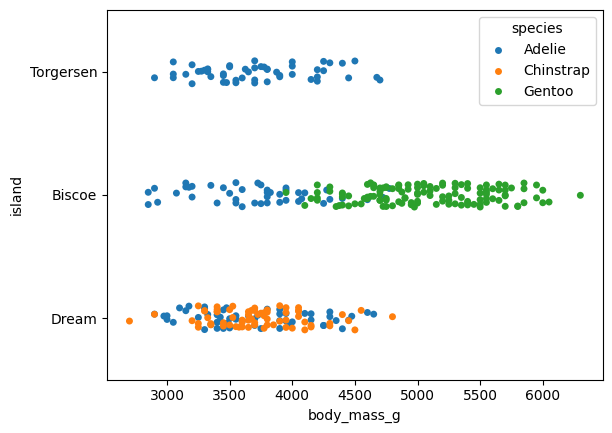

In [ ]:
sns.stripplot(x= df['body_mass_g'],y= df['island'], hue= df['species'])
plt.show();

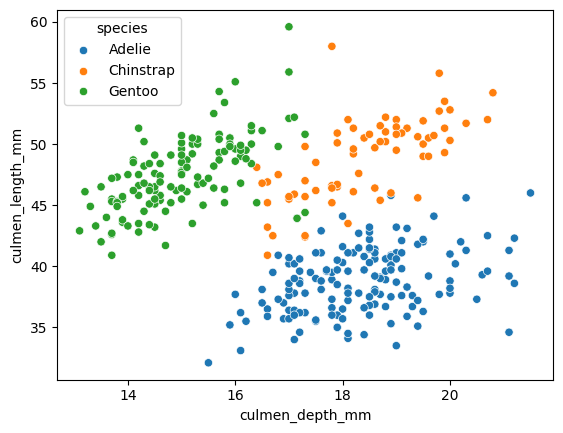

In [ ]:
sns.scatterplot(x=df['culmen_depth_mm'],y=df['culmen_length_mm'], hue=df['species'])
plt.show();

> Les visualisations faites, il est temps de passer à la modélisation. Séparons le jeu de données en features / target. Assurons-nous d'avoir le bon format de données en entrée de nos futurs modèles.
>
>
* (h) Exécuter la cellule suivante.

In [ ]:
df = df.query("sex != '.'")

In [ ]:
df['body_mass_g'].unique()

array([3750.        , 3800.        , 3250.        , 4199.78005865,
       3450.        , 3650.        , 3625.        , 4675.        ,
       3475.        , 4250.        , 3300.        , 3700.        ,
       3200.        , 4400.        , 4500.        , 3325.        ,
       4200.        , 3400.        , 3600.        , 3950.        ,
       3550.        , 3150.        , 3900.        , 4150.        ,
       4650.        , 3100.        , 3000.        , 4600.        ,
       3425.        , 2975.        , 3500.        , 4300.        ,
       4050.        , 2900.        , 2850.        , 3350.        ,
       4100.        , 3050.        , 4450.        , 4000.        ,
       4700.        , 4350.        , 3725.        , 4725.        ,
       3075.        , 2925.        , 3175.        , 4775.        ,
       3825.        , 4275.        , 4075.        , 3775.        ,
       3875.        , 3275.        , 4475.        , 3975.        ,
       3525.        , 3575.        , 4550.        , 3850.     

In [ ]:
data = df.drop('species', axis = 1)
target = df['species']

data.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Torgersen,43.92193,17.15117,200.915205,4199.780059,MALE
4,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [ ]:
df.sex.value_counts()

sex
MALE      178
FEMALE    165
Name: count, dtype: int64

In [ ]:
# On encode les variables catégoriques restantes.
data = pd.get_dummies(data)

In [ ]:
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,False,False,True,False,True
1,39.50000,17.40000,186.000000,3800.000000,False,False,True,True,False
2,40.30000,18.00000,195.000000,3250.000000,False,False,True,True,False
3,43.92193,17.15117,200.915205,4199.780059,False,False,True,False,True
4,36.70000,19.30000,193.000000,3450.000000,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4199.780059,True,False,False,False,True
340,46.80000,14.30000,215.000000,4850.000000,True,False,False,True,False
341,50.40000,15.70000,222.000000,5750.000000,True,False,False,False,True
342,45.20000,14.80000,212.000000,5200.000000,True,False,False,True,False


In [ ]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,False,False,True,False,True
1,39.50000,17.40000,186.000000,3800.000000,False,False,True,True,False
2,40.30000,18.00000,195.000000,3250.000000,False,False,True,True,False
3,43.92193,17.15117,200.915205,4199.780059,False,False,True,False,True
4,36.70000,19.30000,193.000000,3450.000000,False,False,True,True,False


> Pour entrainer et valider les performances de notre modèle, nous allons séparer le jeu de données en jeu d'entrainement et jeu de test.
>
>
* (i) Exécuter la cellule suivante.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)

> On peut également ajouter une étape de preprocessing à notre modélisation, pour notamment normaliser les données.
>
>
* Choisir un scaler au choix et normaliser les données d'entraînement et de test.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)


### **Modélisation**
> Il est temps de passer à la modélisation !  

In [ ]:
### Regression logistique

LogReg = LogisticRegression()

# Entrainement
LogReg.fit(X_train_norm, y_train)

# Prédiction
y_pred = LogReg.predict(X_test_norm)

pd.crosstab(y_pred, y_test)


species,Adelie,Chinstrap,Gentoo
row_0,,,
Adelie,33,0,0
Chinstrap,0,12,0
Gentoo,0,0,24


In [ ]:
LogReg.score(X_test_norm,y_test)

1.0

In [ ]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_norm, y_train)

y_pred_knn = KNN.predict(X_test_norm)

pd.crosstab(y_pred_knn, y_test)

species,Adelie,Chinstrap,Gentoo
row_0,,,
Adelie,33,0,0
Chinstrap,0,12,0
Gentoo,0,0,24


In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train_norm, y_train)

y_pred_dtc = dtc.predict(X_test_norm)

pd.crosstab(y_pred_dtc, y_test)

species,Adelie,Chinstrap,Gentoo
row_0,,,
Adelie,32,1,0
Chinstrap,0,11,0
Gentoo,1,0,24


In [ ]:
dtc.score(X_test_norm,y_test)

0.9710144927536232

###

In [ ]:
pd.crosstab(df.species, df.island)

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,123,0,0
